In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
weather_data = pd.read_csv('weather_Final.csv',index_col=0)
weather_data.head()

,Year,Month,day,temp_max,temp_avg,temp_min,dewp_max,dewp_avg,dewp_min,humi_max,...,wind_max,wind_avg,wind_min,pres_max,pres_avg,pres_min,prec,Time,DTR,weather
732,2019,1,1,63,57.8,51,59,54.4,50,96,...,8,3.6,0,29.5,29.5,29.4,1.09,2019-1-1,12,Drizzle
733,2019,1,2,53,50.6,48,51,49.0,48,100,...,9,4.5,0,29.6,29.5,29.4,0.00,2019-1-2,5,Cloudy
734,2019,1,3,55,52.1,50,54,50.4,48,97,...,14,5.5,0,29.4,29.3,29.2,0.56,2019-1-3,5,Drizzle
735,2019,1,4,62,52.6,43,59,48.4,40,96,...,23,13.6,6,29.3,29.1,29.0,0.82,2019-1-4,19,Rain
736,2019,1,5,60,45.9,40,40,38.1,35,93,...,16,7.2,0,29.5,29.4,29.3,0.01,2019-1-5,20,Sun


In [3]:
# Target is the last column
Y = weather_data.iloc[:,-1].values
X = weather_data[['temp_avg','dewp_avg','humi_avg','pres_avg','wind_avg','prec','DTR']].values

In [4]:
Y[1:10]

array(['Cloudy', 'Drizzle', 'Rain', 'Sun', 'Cloudy', 'Sun', 'Sun', 'Sun',
       'Sun'], dtype=object)

In [5]:
X

array([[57.8 , 54.4 , 88.6 , ...,  3.6 ,  1.09, 12.  ],
       [50.6 , 49.  , 94.4 , ...,  4.5 ,  0.  ,  5.  ],
       [52.1 , 50.4 , 94.  , ...,  5.5 ,  0.56,  5.  ],
       ...,
       [70.8 , 66.8 , 87.5 , ..., 11.5 ,  0.  , 11.  ],
       [65.8 , 65.1 , 97.8 , ...,  2.7 ,  0.  , 19.  ],
       [70.8 , 68.5 , 92.3 , ...,  9.5 ,  0.  ,  2.  ]])

# Data preprocessing

### remove outliers

<AxesSubplot:xlabel='DTR', ylabel='Count'>

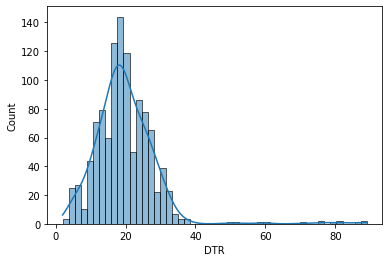

In [6]:
sns.histplot(kde=True, data=weather_data, x='DTR')


In [7]:
weather_data = weather_data[weather_data['DTR'] <= 40]

In [8]:
weather_data.shape

(1084, 22)

<AxesSubplot:xlabel='DTR', ylabel='Count'>

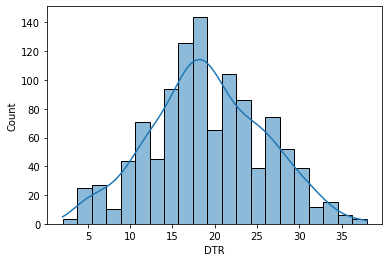

In [9]:
sns.histplot(kde=True, data=weather_data, x='DTR')

### Splitting data into the training set and testing set

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

In [11]:
print(X_train)

[[39.   15.3  40.1  ...  5.5   0.   20.  ]
 [70.7  54.2  59.1  ... 10.1   0.2  13.  ]
 [52.6  48.4  85.8  ... 13.6   0.82 19.  ]
 ...
 [78.1  65.6  66.2  ...  7.6   0.   12.  ]
 [79.   71.7  80.1  ...  5.6   0.24 21.  ]
 [40.4  30.1  66.3  ...  8.    0.   49.  ]]


In [12]:
print(Y_train)

['Sun' 'Drizzle' 'Rain' 'Sun' 'Sun' 'Sun' 'Drizzle' 'Rain' 'Sun' 'Drizzle'
 'Cloudy' 'Sun' 'Drizzle' 'Drizzle' 'Sun' 'Cloudy' 'Drizzle' 'Cloudy'
 'Sun' 'Sun' 'Cloudy' 'Sun' 'Cloudy' 'Sun' 'Sun' 'Sun' 'Cloudy' 'Rain'
 'Sun' 'Cloudy' 'Sun' 'Sun' 'Sun' 'Cloudy' 'Cloudy' 'Drizzle' 'Sun' 'Sun'
 'Sun' 'Cloudy' 'Cloudy' 'Drizzle' 'Sun' 'Rain' 'Sun' 'Sun' 'Cloudy'
 'Drizzle' 'Cloudy' 'Sun' 'Rain' 'Drizzle' 'Sun' 'Sun' 'Drizzle' 'Sun'
 'Cloudy' 'Sun' 'Sun' 'Cloudy' 'Sun' 'Rain' 'Cloudy' 'Rain' 'Sun' 'Cloudy'
 'Sun' 'Cloudy' 'Sun' 'Rain' 'Sun' 'Cloudy' 'Sun' 'Cloudy' 'Cloudy' 'Sun'
 'Sun' 'Sun' 'Sun' 'Sun' 'Rain' 'Drizzle' 'Rain' 'Cloudy' 'Rain' 'Rain'
 'Rain' 'Drizzle' 'Sun' 'Sun' 'Drizzle' 'Drizzle' 'Rain' 'Cloudy' 'Sun'
 'Drizzle' 'Sun' 'Sun' 'Drizzle' 'Cloudy' 'Cloudy' 'Sun' 'Sun' 'Drizzle'
 'Rain' 'Sun' 'Cloudy' 'Sun' 'Cloudy' 'Rain' 'Sun' 'Drizzle' 'Sun'
 'Cloudy' 'Cloudy' 'Sun' 'Drizzle' 'Sun' 'Sun' 'Sun' 'Sun' 'Drizzle'
 'Drizzle' 'Cloudy' 'Drizzle' 'Sun' 'Cloudy' 'Drizzle' 'Sun' 'Drizzl

### Feature Scaling
#### (x-mean(x))/standard deviation(x)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
print(X_test)

[[-0.12201186  0.03893993  0.30036426 ...  0.0084395  -0.37849338
   0.33382139]
 [ 0.12742901  0.56106899  1.21367885 ...  0.70469794 -0.17314555
  -1.01526159]
 [-0.77332968 -0.50252725  0.49033369 ... -0.38942247 -0.37849338
   0.33382139]
 ...
 [ 1.32613096  1.16055051 -0.12341371 ...  0.43945663 -0.37849338
  -0.50935548]
 [-1.90967141 -1.26960575  1.3232766  ...  0.70469794 -0.37849338
  -1.09957928]
 [-0.43381294 -0.79904499 -1.05864785 ... -0.55519829 -0.37849338
   0.8397275 ]]


### Different models

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [16]:
classifier_lr = LogisticRegression(random_state=0)
classifier_rf = RandomForestClassifier(n_estimators=20, random_state=0, criterion='entropy')
classifier_gbc = GradientBoostingClassifier(random_state=0)
classifier_dt = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier_svc = SVC(kernel='rbf',random_state=0)
classifier_knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski',p=2)
classifier_nbc = GaussianNB()
classifier_xgb = XGBClassifier()

In [17]:
Y_pred_lr = classifier_lr.fit(X_train,Y_train).predict(X_test)
Y_pred_rf = classifier_rf.fit(X_train, Y_train).predict(X_test)
Y_pred_gbc = classifier_gbc.fit(X_train, Y_train).predict(X_test)
Y_pred_dt = classifier_dt.fit(X_train,Y_train).predict(X_test)
Y_pred_svc = classifier_svc.fit(X_train, Y_train).predict(X_test)
Y_pred_knn = classifier_knn.fit(X_train, Y_train).predict(X_test)
Y_pred_nb = classifier_nbc.fit(X_train, Y_train).predict(X_test)
Y_pred_xgb = classifier_xgb.fit(X_train, Y_train).predict(X_test)

[01:58:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhangyixin/opt/anaconda3/envs/AI/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Making confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
print('LogisticRregression\n',confusion_matrix(Y_pred_lr,Y_test))
print('RandomForest\n', confusion_matrix(Y_pred_rf,Y_test))
print('GradientBoostingClassifier\n', confusion_matrix(Y_pred_gbc, Y_test))
print('DecisionTreeClassifier\n',confusion_matrix(Y_pred_dt,Y_test))
print('SupportingVectorClassifer\n', confusion_matrix(Y_pred_svc,Y_test))
print('KNeighborsClassifer\n', confusion_matrix(Y_pred_knn, Y_test))
print('NaiveBayesClassifer\n',confusion_matrix(Y_pred_nb,Y_test))
print('XGBoostClassifier\n', confusion_matrix(Y_pred_xgb,Y_test))

LogisticRregression
 [[31  4  1 19]
 [ 0 20 10  0]
 [ 0  5 18  0]
 [19  5  1 87]]
RandomForest
 [[48  0  0 17]
 [ 0 24 14  0]
 [ 0  7 16  0]
 [ 2  3  0 89]]
GradientBoostingClassifier
 [[48  0  0 17]
 [ 0 26 10  0]
 [ 0  5 20  0]
 [ 2  3  0 89]]
DecisionTreeClassifier
 [[33  1  0 11]
 [ 0 21 10  0]
 [ 0 10 20  0]
 [17  2  0 95]]
SupportingVectorClassifer
 [[40  4  1 19]
 [ 0 15  4  0]
 [ 0  5 19  0]
 [10 10  6 87]]
KNeighborsClassifer
 [[42  6  2 22]
 [ 1 12 10  1]
 [ 0  4 14  0]
 [ 7 12  4 83]]
NaiveBayesClassifer
 [[  2   0   0   1]
 [  0  30  19   0]
 [  0   4  11   0]
 [ 48   0   0 105]]
XGBoostClassifier
 [[42  0  0 16]
 [ 0 25  8  0]
 [ 0  6 22  0]
 [ 8  3  0 90]]


### Accuracy

In [20]:
print('LogReg Accuracy = {:.2f}'.format(accuracy_score(Y_test,Y_pred_lr)))
print('RandFor Accuracy = {:.2f}'.format(accuracy_score(Y_test,Y_pred_rf)))
print('GBC Accuracy = {:.2f}'.format(accuracy_score(Y_test,Y_pred_gbc)))
print('DT Accuracy = {:.2f}'.format(accuracy_score(Y_test,Y_pred_dt)))
print('SVC Accuracy = {:.2f}'.format(accuracy_score(Y_test,Y_pred_svc)))
print('KNN Accuracy = {:.2f}'.format(accuracy_score(Y_test,Y_pred_knn)))
print('NBC Accuracy = {:.2f}'.format(accuracy_score(Y_test,Y_pred_nb)))
print('XGBoost Accuracy = {:.2f}'.format(accuracy_score(Y_test,Y_pred_xgb)))

LogReg Accuracy = 0.71
RandFor Accuracy = 0.80
GBC Accuracy = 0.83
DT Accuracy = 0.77
SVC Accuracy = 0.73
KNN Accuracy = 0.69
NBC Accuracy = 0.67
XGBoost Accuracy = 0.81


### Applying k-fold Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score
accuracy_lr = cross_val_score(estimator = classifier_lr, X = X_train, y = Y_train, cv = 10)
accuracy_rf = cross_val_score(estimator = classifier_rf, X = X_train, y = Y_train, cv = 10)
accuracy_gbc = cross_val_score(estimator = classifier_gbc, X = X_train, y = Y_train, cv = 10)
accuracy_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = Y_train, cv = 10)
accuracy_svc = cross_val_score(estimator = classifier_svc, X = X_train, y = Y_train, cv = 10)
accuracy_knn = cross_val_score(estimator = classifier_knn, X = X_train, y = Y_train, cv = 10)
accuracy_nbc = cross_val_score(estimator = classifier_nbc, X = X_train, y = Y_train, cv = 10)
accuracy_xgb = cross_val_score(estimator = classifier_xgb, X = X_train, y = Y_train, cv = 10)

/Users/zhangyixin/opt/anaconda3/envs/AI/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:58:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhangyixin/opt/anaconda3/envs/AI/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:58:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhangyixin/opt/anaconda3/envs/AI/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:58:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhangyixin/opt/anaconda3/envs/AI/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/zhangyixin/opt/anaconda3/envs/AI/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:58:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:58:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhangyixin/opt/anaconda3/envs/AI/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:58:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhangyixin/opt/anaconda3/envs/AI/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:58:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhangyixin/opt/anaconda3/envs/AI/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:58:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhangyixin/opt/anaconda3/envs/AI/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/zhangyixin/opt/anaconda3/envs/AI/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:58:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:58:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
print('LogReg Accuracy = {:.2f} %'.format(accuracy_lr.mean()*100)+'  '+'Strandard Deviation = {:.2f} %'.format(accuracy_lr.std()*100))
print('RandFore Accuracy = {:.2f} %'.format(accuracy_rf.mean()*100)+'  '+'Strandard Deviation = {:.2f} %'.format(accuracy_rf.std()*100))
print('GBC Accuracy = {:.2f} %'.format(accuracy_gbc.mean()*100)+'  '+'Strandard Deviation = {:.2f} %'.format(accuracy_gbc.std()*100))
print('DT Accuracy = {:.2f} %'.format(accuracy_dt.mean()*100)+'  '+'Strandard Deviation = {:.2f} %'.format(accuracy_dt.std()*100))
print('SVC Accuracy = {:.2f} %'.format(accuracy_svc.mean()*100)+'  '+'Strandard Deviation = {:.2f} %'.format(accuracy_svc.std()*100))
print('KNN Accuracy = {:.2f} %'.format(accuracy_knn.mean()*100)+'  '+'Strandard Deviation = {:.2f} %'.format(accuracy_knn.std()*100))
print('NBC Accuracy = {:.2f} %'.format(accuracy_nbc.mean()*100)+'  '+'Strandard Deviation = {:.2f} %'.format(accuracy_nbc.std()*100))
print('XGB Accuracy = {:.2f} %'.format(accuracy_xgb.mean()*100)+'  '+'Strandard Deviation = {:.2f} %'.format(accuracy_xgb.std()*100))

LogReg Accuracy = 70.58 %  Strandard Deviation = 1.30 %
RandFore Accuracy = 77.21 %  Strandard Deviation = 3.72 %
GBC Accuracy = 78.34 %  Strandard Deviation = 3.99 %
DT Accuracy = 73.32 %  Strandard Deviation = 3.21 %
SVC Accuracy = 71.73 %  Strandard Deviation = 4.72 %
KNN Accuracy = 63.63 %  Strandard Deviation = 4.00 %
NBC Accuracy = 74.47 %  Strandard Deviation = 3.08 %
XGB Accuracy = 76.06 %  Strandard Deviation = 4.19 %


In [32]:
from sklearn.metrics import classification_report
print('LogisticRregression\n',classification_report(Y_test,Y_pred_lr, zero_division=0))
print('RandomForest\n',classification_report(Y_test,Y_pred_rf, zero_division=0))
print('GradientBoostingClassifier\n',classification_report(Y_test,Y_pred_gbc, zero_division=0))
print('DecisionTreeClassifier\n',classification_report(Y_test,Y_pred_dt, zero_division=0))
print('SupportingVectorClassifer\n',classification_report(Y_test,Y_pred_svc, zero_division=0))
print('KNeighborsClassifer\n',classification_report(Y_test,Y_pred_knn, zero_division=0))
print('NaiveBayesClassifer\n',classification_report(Y_test,Y_pred_nbc, zero_division=0))
print('XGBoostClassifier\n',classification_report(Y_test,Y_pred_xgb, zero_division=0))



LogisticRregression
               precision    recall  f1-score   support

      Cloudy       0.56      0.62      0.59        50
     Drizzle       0.67      0.59      0.62        34
        Rain       0.78      0.60      0.68        30
         Sun       0.78      0.82      0.80       106

    accuracy                           0.71       220
   macro avg       0.70      0.66      0.67       220
weighted avg       0.71      0.71      0.71       220

RandomForest
               precision    recall  f1-score   support

      Cloudy       0.74      0.96      0.83        50
     Drizzle       0.63      0.71      0.67        34
        Rain       0.70      0.53      0.60        30
         Sun       0.95      0.84      0.89       106

    accuracy                           0.80       220
   macro avg       0.75      0.76      0.75       220
weighted avg       0.82      0.80      0.80       220

GradientBoostingClassifier
               precision    recall  f1-score   support

      Cloudy

NameError: name 'Y_pred_nbc' is not defined

In [44]:
unique, counts = np.unique(Y_train, return_counts=True)
dict(zip(unique, counts))

{'Cloudy': 218, 'Drizzle': 148, 'Rain': 115, 'Sun': 396}